In [325]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from itertools import combinations
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [339]:
cara = requests.get('http://survivor.wikia.com/wiki/Survivor:_Caramoan')
soup = BeautifulSoup(cara.content, 'lxml')

# use select() bec 2 css classes
voting_table = soup.select('table.wikitable.article-table')[-1]
voting_table

names = voting_table.find_all('td', style = 'text-align: left;')

contestants = []
for voter in names:
    contestants.append(voter.text.strip())
    
season_list = []
for voter in names:
    voter_dict = {'Name' : voter.text.strip()}
    inc = 0
    for voted in voter.find_next_siblings():
        if voted.text.strip() == 'Jury Vote':
            continue
#        if not ((voted.text.strip() in contestants) or (voted.text.strip() == '—')):
#            continue
        if voted.has_attr('colspan'):
            numcol = int(voted['colspan'])
            for i in range(numcol):  
                voter_dict[inc] = '—'
                inc += 1
            continue
        voter_dict[inc] = voted.text.strip()
        inc += 1
    season_list.append(voter_dict)

dd = pd.DataFrame(season_list).set_index('Name')
dd = dd[list(range(len(dd.columns)))]
dd

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Name,,,,,,,,,,,,,,,,,,,,,
Cochran,Francesca,—,—,—,—,—,Brandon,Matt,Michael,Julia,...,Malcolm,Malcolm,Eddie,Eddie,Brenda,—,Eddie,NaN,NaN,NaN
Dawn,Francesca,—,—,—,—,—,Brandon,Matt,Julia,Julia,...,Reynold,Malcolm,Reynold,Eddie,Brenda,—,Eddie,NaN,NaN,NaN
Sherri,—,Allie,Hope,Hope,—,Laura,—,—,—,—,...,Reynold,Malcolm,Reynold,Andrea,Brenda,—,Eddie,NaN,NaN,NaN
Eddie,—,Shamar,Shamar,None,—,Laura,—,—,—,—,...,Andrea,Malcolm,Sherri,Brenda,Erik,—,Dawn,,,Cochran
Erik,Andrea,—,—,—,—,—,Brandon,—,—,—,...,Malcolm,Malcolm,Eddie,Andrea,Eddie,Evacuated,,,,Cochran
Brenda,Andrea,—,—,—,—,—,Brandon,—,—,—,...,Reynold,Malcolm,Reynold,Andrea,Eddie,,,,,Cochran
Andrea,Francesca,—,—,—,—,—,Brandon,—,—,—,...,Malcolm,None,Reynold,Brenda,,,,,,Cochran
Reynold,—,Shamar,Shamar,Shamar,—,Laura,—,—,—,—,...,Andrea,None,Erik,,,,,,,Cochran
Malcolm,Francesca,—,—,—,—,—,Brandon,—,—,—,...,Andrea,None,,,,,,,,Cochran


In [334]:
pairs = list(combinations(contestants,2))
pair_dict_list = []
for col_index in dd.columns:
    voting_dict = dd.groupby(col_index).groups
    pair_dict = defaultdict(int)
    candidates = voting_dict.keys()
    candidates = [name for name in candidates if name in contestants]
    cross = list(combinations(candidates,2))
    print(candidates,cross)
    for voted in candidates:
        for i in voting_dict[voted]:
            for j in voting_dict[voted]:
                if (i,j) in pairs:
                    pair_dict[(i,j)] = 1
    for (c1,c2) in cross:
        for i in voting_dict[c1]:
            for j in voting_dict[c2]:
                if (i,j) in pairs:
                    pair_dict[(i,j)] = 0
        for i in voting_dict[c2]:
            for j in voting_dict[c1]:
                if (i,j) in pairs:
                    pair_dict[(i,j)] = 0
    pair_dict_list.append(pair_dict)

['Andrea', 'Francesca'] [('Andrea', 'Francesca')]
['Allie', 'Shamar'] [('Allie', 'Shamar')]
['Eddie', 'Hope', 'Shamar'] [('Eddie', 'Hope'), ('Eddie', 'Shamar'), ('Hope', 'Shamar')]
['Hope', 'Shamar'] [('Hope', 'Shamar')]
[] []
['Laura', 'Reynold'] [('Laura', 'Reynold')]
['Brandon', 'Phillip'] [('Brandon', 'Phillip')]
['Matt', 'Julia', 'Dawn'] [('Matt', 'Julia'), ('Matt', 'Dawn'), ('Julia', 'Dawn')]
['Michael', 'Julia'] [('Michael', 'Julia')]
['Julia'] []
['Sherri', 'Corinne'] [('Sherri', 'Corinne')]
['Michael', 'Reynold', 'Andrea'] [('Michael', 'Reynold'), ('Michael', 'Andrea'), ('Reynold', 'Andrea')]
['Malcolm', 'Phillip', 'Eddie'] [('Malcolm', 'Phillip'), ('Malcolm', 'Eddie'), ('Phillip', 'Eddie')]
['Malcolm', 'Reynold', 'Andrea'] [('Malcolm', 'Reynold'), ('Malcolm', 'Andrea'), ('Reynold', 'Andrea')]
['Malcolm'] []
['Sherri', 'Erik', 'Reynold', 'Eddie'] [('Sherri', 'Erik'), ('Sherri', 'Reynold'), ('Sherri', 'Eddie'), ('Erik', 'Reynold'), ('Erik', 'Eddie'), ('Reynold', 'Eddie')]
['And

In [218]:
pair_dict_list

[defaultdict(int,
             {('Andrea', 'Corinne'): 1,
              ('Andrea', 'Malcolm'): 1,
              ('Andrea', 'Phillip'): 1,
              ('Brandon', 'Francesca'): 1,
              ('Brenda', 'Andrea'): 0,
              ('Brenda', 'Brandon'): 1,
              ('Brenda', 'Corinne'): 0,
              ('Brenda', 'Francesca'): 1,
              ('Brenda', 'Malcolm'): 0,
              ('Brenda', 'Phillip'): 0,
              ('Cochran', 'Andrea'): 1,
              ('Cochran', 'Corinne'): 1,
              ('Cochran', 'Dawn'): 1,
              ('Cochran', 'Malcolm'): 1,
              ('Cochran', 'Phillip'): 1,
              ('Dawn', 'Andrea'): 1,
              ('Dawn', 'Corinne'): 1,
              ('Dawn', 'Malcolm'): 1,
              ('Dawn', 'Phillip'): 1,
              ('Erik', 'Andrea'): 0,
              ('Erik', 'Brandon'): 1,
              ('Erik', 'Brenda'): 1,
              ('Erik', 'Corinne'): 0,
              ('Erik', 'Francesca'): 1,
              ('Erik', 'Malcolm'): 0

In [335]:
alli = pd.DataFrame(pair_dict_list).T
alli.mean(axis=1).sort_values(ascending=False)

(Reynold, Allie)        1.000000
(Hope, Allie)           1.000000
(Cochran, Phillip)      1.000000
(Erik, Francesca)       1.000000
(Reynold, Hope)         1.000000
(Reynold, Corinne)      1.000000
(Brenda, Francesca)     1.000000
(Michael, Shamar)       1.000000
(Brandon, Francesca)    1.000000
(Sherri, Julia)         1.000000
(Michael, Matt)         1.000000
(Eddie, Allie)          1.000000
(Eddie, Corinne)        1.000000
(Eddie, Hope)           1.000000
(Matt, Shamar)          1.000000
(Malcolm, Corinne)      1.000000
(Dawn, Sherri)          0.888889
(Eddie, Reynold)        0.888889
(Sherri, Brenda)        0.875000
(Andrea, Phillip)       0.833333
(Dawn, Corinne)         0.833333
(Reynold, Malcolm)      0.800000
(Eddie, Malcolm)        0.800000
(Dawn, Andrea)          0.750000
(Sherri, Matt)          0.750000
(Sherri, Laura)         0.750000
(Julia, Laura)          0.750000
(Dawn, Phillip)         0.750000
(Erik, Brenda)          0.727273
(Cochran, Dawn)         0.714286
          

In [237]:
mean_count = pd.DataFrame([alli.mean(axis=1),alli.count(axis=1)]).T

In [336]:
alli[alli.count(axis=1)>5]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
"(Andrea, Malcolm)",1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
"(Andrea, Phillip)",1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
"(Andrea, Reynold)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
"(Brenda, Andrea)",0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
"(Brenda, Malcolm)",0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
"(Brenda, Phillip)",0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
"(Brenda, Reynold)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
"(Cochran, Andrea)",1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
"(Cochran, Brenda)",0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
"(Cochran, Corinne)",1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0    1.0
1    1.5
2    2.0
dtype: float64


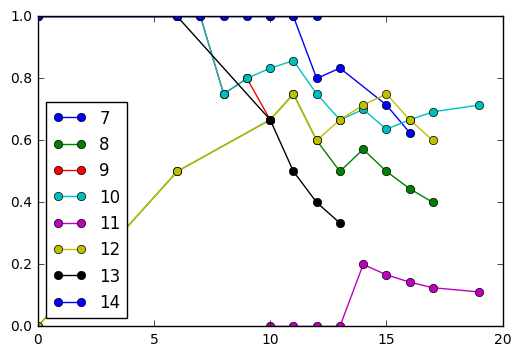

In [342]:
def calculate_agreement_metric(series):
    out = []
    for i in range(len(series)):
        out.append(series[:i+1].mean())
    return pd.Series(out, index=series.index)
        
print(calculate_agreement_metric(pd.Series([1,2,3])))
#plt.plot(calculate_agreement_metric(alli[alli.count(axis=1)>5].ix[8].dropna()).index,calculate_agreement_metric(alli[alli.count(axis=1)>5].ix[8].dropna()),'o-',label='CocBren')
#plt.plot(calculate_agreement_metric(alli[alli.count(axis=1)>5].ix[10].dropna()).index,calculate_agreement_metric(alli[alli.count(axis=1)>5].ix[10].dropna()),'o-',label='CocDawn')
#plt.plot(calculate_agreement_metric(alli[alli.count(axis=1)>5].ix[28].dropna()).index,calculate_agreement_metric(alli[alli.count(axis=1)>5].ix[28].dropna()),'o-',label='EdRey')
#plt.legend(loc='lower right')

for i in range(7,15):
    plt.plot(calculate_agreement_metric(alli[alli.count(axis=1)>5].ix[i].dropna()).index,calculate_agreement_metric(alli[alli.count(axis=1)>5].ix[i].dropna()),'o-',label=i)
plt.legend(loc='lower left')

In [283]:
len(calculate_agreement_metric(alli[alli.count(axis=1)>5].ix[5].dropna()))

14

In [216]:
a.remove([1,2])

ValueError: list.remove(x): x not in list

In [318]:
(alli[alli.count(axis=1)>5].ix[4].dropna())

6     1.0
10    1.0
11    1.0
12    0.0
13    1.0
14    1.0
15    1.0
17    0.0
Name: (Cochran, Erik), dtype: float64

In [292]:
mean_count.sort_values(1,ascending=False)

,0,1
"(Cochran, Dawn)",0.714286,14.0
"(Eddie, Reynold)",0.727273,11.0
"(Erik, Brenda)",0.800000,10.0
"(Dawn, Sherri)",0.888889,9.0
"(Cochran, Sherri)",0.555556,9.0
"(Cochran, Brenda)",0.375000,8.0
"(Erik, Andrea)",0.625000,8.0
"(Brenda, Andrea)",0.750000,8.0
"(Cochran, Phillip)",1.000000,8.0
"(Erik, Malcolm)",0.428571,7.0


In [295]:
season_list

[{0: 'Francesca',
  1: '—',
  2: '—',
  3: '—',
  4: '—',
  5: 'Brandon',
  6: 'Matt',
  7: 'Michael',
  8: 'Julia',
  9: 'Corinne',
  10: 'Michael',
  11: 'Malcolm',
  12: 'Malcolm',
  13: 'Malcolm',
  14: 'Eddie',
  15: 'Eddie',
  16: 'Brenda',
  'Name': 'Cochran',
  18: 'Eddie',
  17: '—'},
 {0: 'Francesca',
  1: '—',
  2: '—',
  3: '—',
  4: '—',
  5: 'Brandon',
  6: 'Matt',
  7: 'Julia',
  8: 'Julia',
  9: 'Corinne',
  10: 'Michael',
  11: 'Eddie',
  12: 'Reynold',
  13: 'Malcolm',
  14: 'Reynold',
  15: 'Eddie',
  16: 'Brenda',
  'Name': 'Dawn',
  18: 'Eddie',
  17: '—'},
 {0: '—',
  1: 'Allie',
  2: 'Hope',
  3: 'Hope',
  4: '—',
  5: 'Laura',
  6: '—',
  7: '—',
  8: '—',
  9: 'Corinne',
  10: 'Michael',
  11: 'Eddie',
  12: 'Reynold',
  13: 'Malcolm',
  14: 'Reynold',
  15: 'Andrea',
  16: 'Brenda',
  'Name': 'Sherri',
  18: 'Eddie',
  17: '—'},
 {0: '—',
  1: 'Shamar',
  2: 'Shamar',
  3: 'None',
  4: '—',
  5: 'Laura',
  6: '—',
  7: '—',
  8: '—',
  9: 'Sherri',
  10: 'Andr

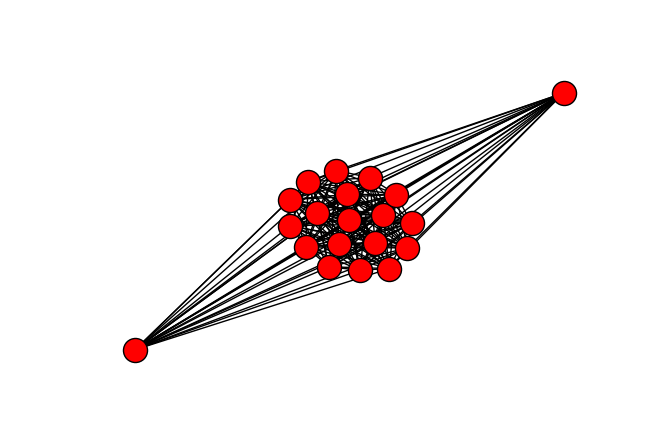

In [384]:
weights = alli.mean(axis=1)
edgeweights = []
w = []
for i in range(len(weights)):
    edgeweights.append((weights.keys()[i][0], weights.keys()[i][1], {'weight': weights.ix[i]}))
    w.append(weights.ix[i])

In [382]:
edgeweights

[('Andrea', 'Brandon', {'weight': 0.0}),
 ('Andrea', 'Corinne', {'weight': 0.66666666666666663}),
 ('Andrea', 'Francesca', {'weight': 0.0}),
 ('Andrea', 'Malcolm', {'weight': 0.42857142857142855}),
 ('Andrea', 'Michael', {'weight': 0.33333333333333331}),
 ('Andrea', 'Phillip', {'weight': 0.83333333333333337}),
 ('Andrea', 'Reynold', {'weight': 0.16666666666666666}),
 ('Brandon', 'Francesca', {'weight': 1.0}),
 ('Brenda', 'Andrea', {'weight': 0.66666666666666663}),
 ('Brenda', 'Brandon', {'weight': 0.5}),
 ('Brenda', 'Corinne', {'weight': 0.33333333333333331}),
 ('Brenda', 'Francesca', {'weight': 1.0}),
 ('Brenda', 'Malcolm', {'weight': 0.2857142857142857}),
 ('Brenda', 'Michael', {'weight': 0.33333333333333331}),
 ('Brenda', 'Phillip', {'weight': 0.66666666666666663}),
 ('Brenda', 'Reynold', {'weight': 0.16666666666666666}),
 ('Cochran', 'Andrea', {'weight': 0.625}),
 ('Cochran', 'Brandon', {'weight': 0.0}),
 ('Cochran', 'Brenda', {'weight': 0.40000000000000002}),
 ('Cochran', 'Corinne

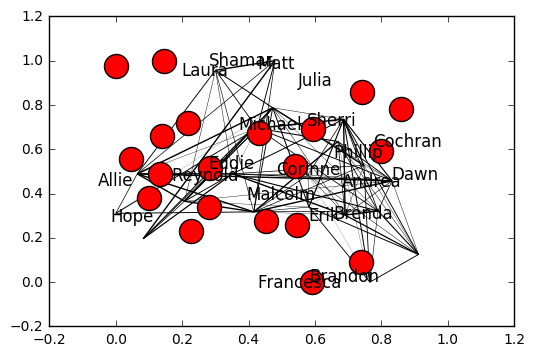

In [385]:
import networkx as nx
G=nx.Graph()
G.add_nodes_from(contestants)
G.add_edges_from(edgeweights)
nx.draw_networkx_nodes(G,nx.spring_layout(G))
nx.draw_networkx_labels(G,nx.spring_layout(G),label=contestants)
nx.draw_networkx_edges(G,nx.spring_layout(G),width=w)